## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mice = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")

mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.
mice['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
micesort = mice.sort_values(["Mouse ID", "Timepoint"])

micesort

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

micedupe = micesort[micesort.duplicated(['Mouse ID', 'Timepoint'])]

micedupe

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
miceclean = micesort.drop_duplicates(['Mouse ID', 'Timepoint'])
miceclean = micesort.loc[micesort['Mouse ID'] != 'g989']

miceclean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
miceclean['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

micegroup = miceclean.groupby(['Drug Regimen'])['Tumor Volume (mm3)']

micemean = micegroup.mean()
micemed = micegroup.median()
micevar = micegroup.var()
micestd = micegroup.std()
micesem = micegroup.sem()

summary = pd.merge(micemean, micemed, on = 'Drug Regimen', how = 'outer')
summary = pd.merge(summary, micevar, on = 'Drug Regimen', how = 'outer' )
summary = summary.rename(columns = {'Tumor Volume (mm3)_x' : 'Mean', 'Tumor Volume (mm3)_y' : 'Median', 'Tumor Volume (mm3)' : 'Variance'})
summary = pd.merge(summary, micestd, on = 'Drug Regimen', how = 'outer' )
summary = pd.merge(summary, micesem, on = 'Drug Regimen', how = 'outer' )
summary = summary.rename(columns = {'Tumor Volume (mm3)_x' : 'Std. Dev.', 'Tumor Volume (mm3)_y' : 'SEM'})

summary


,Mean,Median,Variance,Std. Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

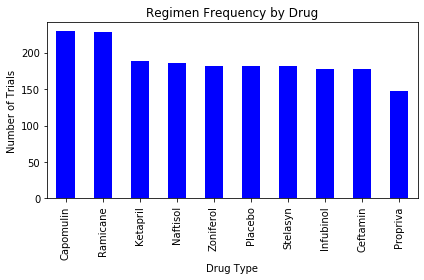

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
micedrug = miceclean['Drug Regimen'].value_counts()
micedrug.sort_values(ascending = False)
micedrug.plot(kind = 'bar', color = "blue")

plt.title("Regimen Frequency by Drug")
plt.ylabel("Number of Trials")
plt.xlabel("Drug Type")
plt.tight_layout()

Text(0, 0.5, 'Number of Trials')

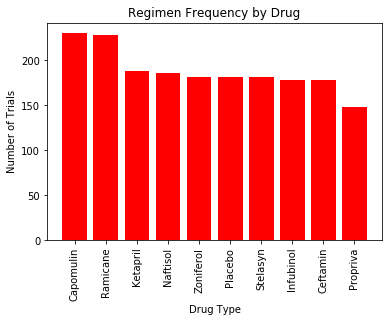

In [9]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
micedrug

drugname = micedrug.keys()
drugamount = [micedrug[0], micedrug[1], micedrug[2], micedrug[3], micedrug[4], 
             micedrug[5], micedrug[6], micedrug[7], micedrug[8], micedrug[9]]
ticks = [x for x in drugname]

plt.bar(drugname, drugamount, color = "red")
plt.xticks(ticks, rotation = 'vertical')
plt.title("Regimen Frequency by Drug")
plt.xlabel("Drug Type")
plt.ylabel("Number of Trials")

## Pie Plots

Text(0.5, 1.0, 'Mouse Distribution by Sex')

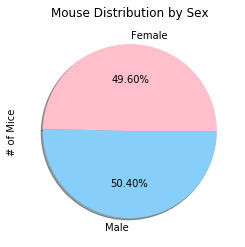

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

micefem = miceclean.loc[miceclean['Sex'] == 'Female']
micemale = miceclean.loc[miceclean['Sex']== 'Male']
micefem = micefem.nunique()['Mouse ID']
micemale = micemale.nunique()['Mouse ID']

gender_df = pd.DataFrame({'Sex': ['Female', 'Male'], "# of Mice" : [micefem, micemale]})
gender_df = gender_df.set_index('Sex')
colors = ['pink', 'lightskyblue']
gender_df.plot(kind = 'pie', colors = colors, autopct = "%1.2f%%", y = gender_df.keys(), shadow = True, legend = None)
plt.title("Mouse Distribution by Sex")

Text(0.5, 1.0, 'Mouse Distribution by Sex')

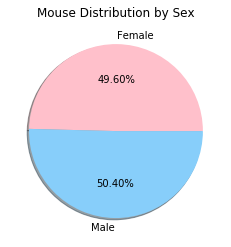

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = gender_df.index
plt.pie(gender_df['# of Mice'], labels = labels, colors = colors, autopct = "%1.2f%%", shadow = True)

plt.title("Mouse Distribution by Sex")


## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

max_df = miceclean.groupby("Mouse ID").nth(-1)
max_df = max_df.reset_index()

infubinol = max_df.loc[max_df['Drug Regimen']== 'Infubinol']['Tumor Volume (mm3)']
i_quartiles = infubinol.quantile([.25, .5, .75])
i_lower = i_quartiles[.25]
i_upper = i_quartiles[.75]
i_median = i_quartiles[.5]
i_iqr = i_upper - i_lower
i_lower_b = i_lower - (1.5*i_iqr)
i_upper_b = i_upper + (1.5*i_iqr)

capomulin = max_df.loc[max_df['Drug Regimen']== 'Capomulin']['Tumor Volume (mm3)']
cap_quartiles = capomulin.quantile([.25, .5, .75])
cap_lower = cap_quartiles[.25]
cap_upper = cap_quartiles[.75]
cap_median = cap_quartiles[.5]
cap_iqr = cap_upper - cap_lower
cap_lower_b = cap_lower - (1.5*cap_iqr)
cap_upper_b = cap_upper + (1.5*cap_iqr)

ramicane = max_df.loc[max_df['Drug Regimen']== 'Ramicane']['Tumor Volume (mm3)']
r_quartiles = ramicane.quantile([.25, .5, .75])
r_lower = r_quartiles[.25]
r_upper = r_quartiles[.75]
r_median = r_quartiles[.5]
r_iqr = r_upper - r_lower
r_lower_b = r_lower - (1.5*r_iqr)
r_upper_b = r_upper + (1.5*r_iqr)

ceftamin = max_df.loc[max_df['Drug Regimen']== 'Ceftamin']['Tumor Volume (mm3)']
ce_quartiles = ceftamin.quantile([.25, .5, .75])
ce_lower = ce_quartiles[.25]
ce_upper = ce_quartiles[.75]
ce_median = ce_quartiles[.5]
ce_iqr = ce_upper - ce_lower
ce_lower_b = ce_lower - (1.5*ce_iqr)
ce_upper_b = ce_upper + (1.5*ce_iqr)



Text(0.5, 1.0, 'Final Tumor Volume for 4 Prominent Treatments')

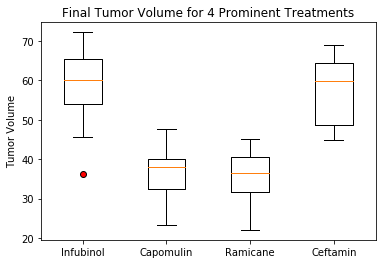

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot([infubinol, capomulin, ramicane, ceftamin], labels = ['Infubinol', 'Capomulin', 'Ramicane', 'Ceftamin'], flierprops = {"markerfacecolor": "red"})
plt.ylabel("Tumor Volume")
plt.title("Final Tumor Volume for 4 Prominent Treatments")

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
micecap = miceclean.loc[miceclean['Drug Regimen'] == 'Capomulin']
micecap.head()

In [ ]:
mice_id = input("Which Mouse ID are you researching?")
indmouse = micecap.loc[micecap['Mouse ID'] == mice_id]
plt.plot(indmouse['Timepoint'], indmouse['Tumor Volume (mm3)'], color = 'Red', label = "Tumor Volume over Time")
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Subject Mouse Tumor Growth Over Time')
indmouse

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
micescatter = micecap.groupby(['Mouse ID']).mean()[['Weight (g)', 'Tumor Volume (mm3)']]
micescatter.plot(kind = 'scatter', x = 'Weight (g)', y = 'Tumor Volume (mm3)', grid = True, title = "Capomulin: Tumor Volume vs. Weight")

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and avaerage tumor volume for the Capomulin regimen
x = micescatter['Weight (g)']
y = micescatter['Tumor Volume (mm3)']
(slope, intercept, pvalue, rvalue, stderr) = stats.linregress(x,y)
line = slope * x + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y, facecolors= 'orange')
plt.plot(x,line, color = 'red')
plt.grid(b=True)
print(line_eq)

In [ ]:
correlation = st.pearsonr(micescatter['Weight (g)'], micescatter['Tumor Volume (mm3)'])
print(f'The correlation between weight and average tumor volume is {round(correlation[0],2)}')